![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## Exploratory data analysis

In [1]:
# Import pandas
import pandas as pd

In [2]:
# Load the data from men_results.csv and women_results.csv
men_results = pd.read_csv('datasets/men_results.csv', parse_dates=['date'], index_col=0)
women_results = pd.read_csv('datasets/women_results.csv', parse_dates=['date'], index_col=0)

In [3]:
# Determining the column names, data types, and values for men
men_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44353 entries, 0 to 44352
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        44353 non-null  datetime64[ns]
 1   home_team   44353 non-null  object        
 2   away_team   44353 non-null  object        
 3   home_score  44353 non-null  int64         
 4   away_score  44353 non-null  int64         
 5   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.4+ MB


In [4]:
#View first few rows
men_results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


There have been 44,353 men's soccer matches on this dataset

In [5]:
# Name and count of tournaments
men_results['tournament'].value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

Out of the total matches, 17,519 were friendly tournaments folloed by FIFA World Cup qualification with 7878 matches. This indicates a significant portion of matches is attributed to friendly competitions, which are not part of the official World Cup.

In [6]:
# Determining the column names, data types, and values for women
women_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 0 to 4883
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4884 non-null   datetime64[ns]
 1   home_team   4884 non-null   object        
 2   away_team   4884 non-null   object        
 3   home_score  4884 non-null   int64         
 4   away_score  4884 non-null   int64         
 5   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 267.1+ KB


There have been 4884 women's soccer matches on this dataset

In [7]:
# Name and count of tournaments
women_results['tournament'].value_counts()

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

Out of the total women's matches, 1,445 were UEFA Euro qualification tournaments. This indicates that the women's football landscape were prevalent via regional qualification tournaments, such as those organized by UEFA.

##  Filtering the data

Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.

In [8]:
# Filtering for FIFA World Cup matches

# Men's matches
men_wc = men_results[(men_results['tournament'] == 'FIFA World Cup') & (men_results['date'] > '2002-01-01')]

# View dataframe
men_wc

,date,home_team,away_team,home_score,away_score,tournament
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup
...,...,...,...,...,...,...
44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


In [9]:
# Filtering for FIFA World Cup matches

# Women's matches
women_wc = women_results[(women_results['tournament'] == 'FIFA World Cup') & (women_results['date'] > '2002-01-01')]

# View dataframe
women_wc

,date,home_team,away_team,home_score,away_score,tournament
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup
...,...,...,...,...,...,...
4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup
4466,2019-07-02,England,United States,1,2,FIFA World Cup
4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup
4468,2019-07-06,England,Sweden,1,2,FIFA World Cup


## Choosing the correct hypothesis test

Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.

An **unpaired t-test** and a **Wilcoxon-Mann-Whitney test** are the two most commmon two-sample tests, where the latter is a non-parametric version of the unpaired t-test.

Determine if a parametric or non-parametric test is appropriate by verifying the underlying assumptions of parametric tests--that is checking the sample size in each group and the normality of each distribution.

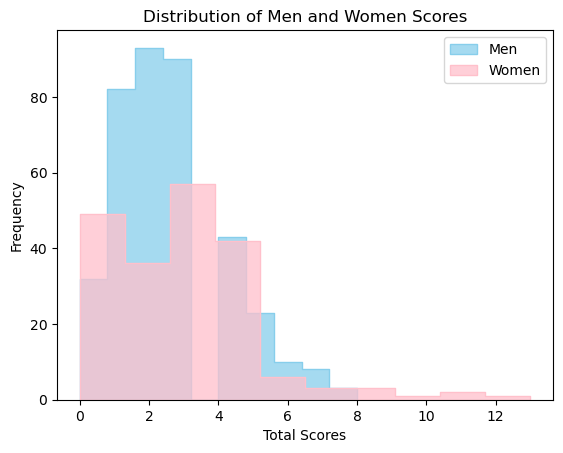

In [10]:
# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the number of goals scored in men's and women's matches
men_scores = men_wc['home_score'] + men_wc['away_score']
women_scores = women_wc['home_score'] + women_wc['away_score']

sns.histplot(men_scores, color='skyblue', element='step', bins=10, label='Men')
sns.histplot(women_scores, color='pink', element='step', bins=10, label='Women')

plt.title('Distribution of Men and Women Scores')
plt.xlabel('Total Scores')
plt.ylabel('Frequency')
plt.legend();

Looks like distribution of scores is longer on the right side (right-skewed) of its peak for both men and women. Visually, both distributions are not normally distributed and a non-parametric test is suitable to use.

Since the data is not normally distributed (as indicated by the histogram), a non-parametric test is opted. The **Wilcoxon-Mann-Whitney test** is a non-parametric test used to compare two independent groups when the assumption of normality is violated.

## Performing the hypothesis test

In [11]:
# Perform the Wilcoxon-Mann-Whitney test
from scipy.stats import mannwhitneyu

mwu_result = mannwhitneyu(x=women_scores, y=men_scores, alternative='greater')

# Extract the p-value from the result
mwu_pvalue = mwu_result.pvalue

# Decide whether to reject null hypothesis or failed to reject null hypothesis
decision = ''
alpha = 0.10
if mwu_pvalue <= alpha:
    decision = 'reject'
else:
    decision = 'fail to reject'
    

result_dict = {"p_val": mwu_pvalue, "result": decision}

print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


## Interpreting the Result

If the p-value from the Mann-Whitney U test is 0.0051 and the chosen significance level is 0.10, then the p-value is less than the significance level.

Interpreting this result:

- $H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.
- $H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In statistical hypothesis testing, this implies to reject the null hypothesis. This means that there is statistically significant evidence to suggest that the mean number of goals scored in women's international soccer matches is greater from men's at a 10% significance level.

This suggests that the observed difference between the two groups is unlikely to have occurred by random chance alone. 